<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет,  Александр! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).


Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.

Расскажу как обычно проходит проверка:
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

Первым делом прочитаем данные в переменную, не забыв предварительно указать какой столбец у нас будет отвечать за индексы и является типом datetime.



In [11]:
try:
    data = pd.read_csv('/datasets/taxi.csv', index_col=[0], parse_dates=[0])

except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/taxi.csv', index_col=[0], parse_dates=[0])
#03 - 01 ---- 08 - 01
data

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Отлично, при загрузке сразу обрабатываются даты</div>

Супер! Пропусков нет и единтсвенные признак приведен к нужному типу!

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


Чтобы решить задачу прогнозирования количества заказов на следующий час, то нам следует ресемплировать датасет по часам.

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Переделал на sum()</div>
</div>

In [13]:
data = data.resample('1H').sum()
data.info()
data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4416 entries, 2018-03-01 00:00:00 to 2018-08-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  4416 non-null   int64
dtypes: int64(1)
memory usage: 69.0 KB


,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Нашей задачей является предсказание количества поездок на следующий час. Поэтому при ресемплировании нужно использовать агрегационую функцию "сумма", а не среднее. </div>

## Анализ

На всякий случай отсортируем индексы и проверем идут ли они от меньшей даты к большей.

In [14]:
data.sort_index(inplace=True)
data.index.is_monotonic

True

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Изобразим наши данные на графике, также наложим на наш график сглажевание графика с помощью скользящего среднего. По первому взягляду можно заметить рост скользящего среднего - найти причины роста числа заказов по первому взгляду трудно, сочетем это за простую популяризацию такси и ракрутке бренда.

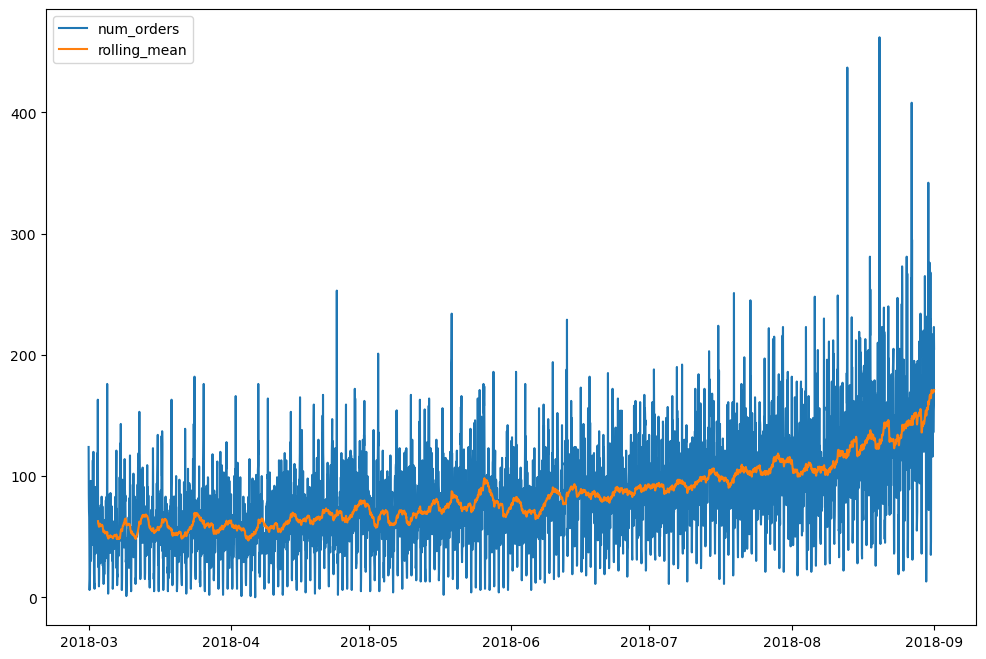

In [15]:
plt.figure(figsize=(12, 8))
plt.plot(data['num_orders'], label='num_orders');
plt.plot(data['num_orders'].rolling(50).mean(), label='rolling_mean');
plt.legend();

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, выведен график временного ряда (по часам). Также хорошо, что приведены "сглаженный" график со скользящим средним.


</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Использовано окно скользящего среднего 50. Это вполне естественно, учитывая что мы привыкли к десятичной системе счисления. Но давай вспомним, что в сутках 24 часа, а в неделе 168. Сутки и неделя - естественные периоды сезонности и взяв окно равное одному из периодов мы получим более чистое скользящее среднее т.к. из него уйдут шумы, связанные с сезонными колебаниями.
</div>

Теперь попробуем найти трендовость и сезоность в наших данных!

In [19]:
decomposed = seasonal_decompose(data)
data

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43
...,...
2018-08-31 19:00:00,136
2018-08-31 20:00:00,154
2018-08-31 21:00:00,159


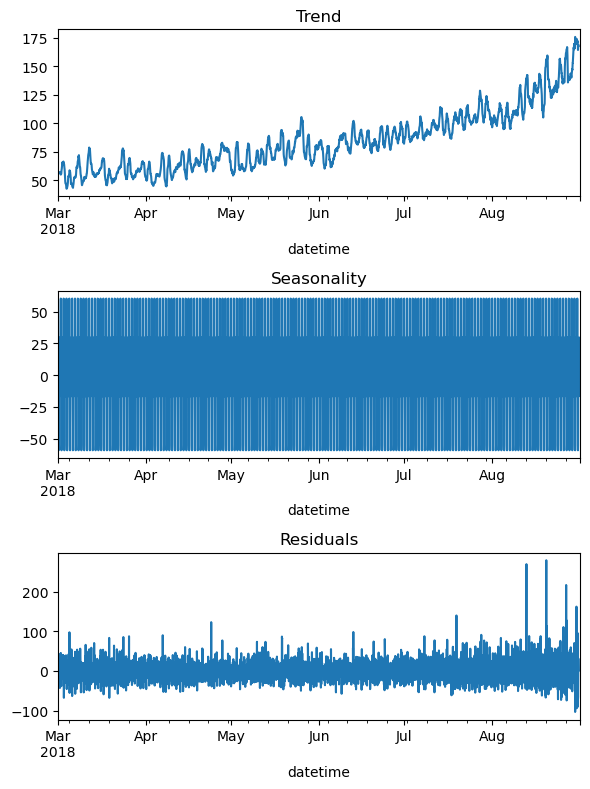

In [17]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
plt.tight_layout()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Есть декомпозиция на тренд и сезонность</div>

Как и оказалось - тренд есть! Количество заказов растёт. А вот сезоность с периодом меньше недели, так что изучим подробнее.

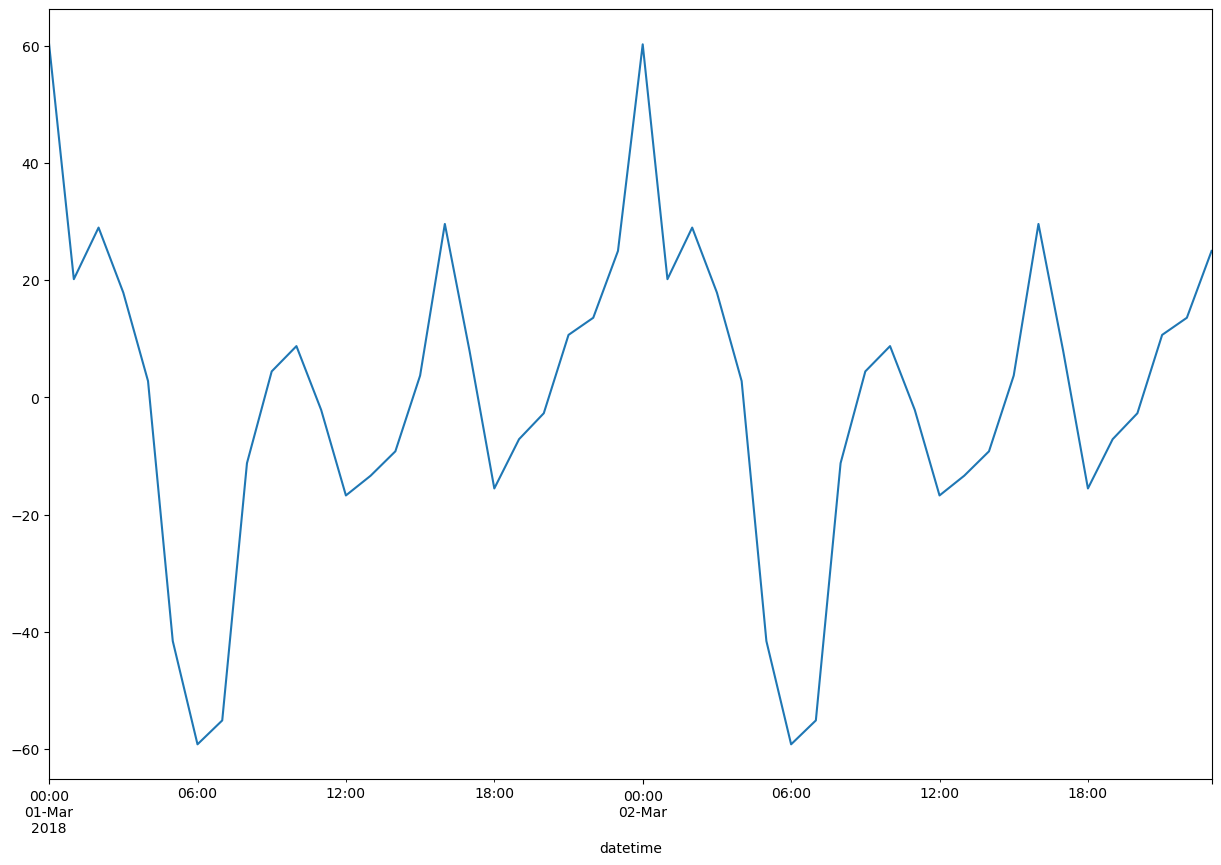

In [18]:
decomposed = seasonal_decompose(data)
plt.figure(figsize=(15, 10))
decomposed.seasonal['2018-03-01':'2018-03-02'].plot(ax=plt.gca());

А вот и сезонность! Минимальное количество заказов в 6 утра, а максимальное в полночь!

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
🔥</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Совет: в данных кроме суточной есть недельная сезонность. Чтобы увидеть её нужно сделать ресемплинг данных по суткам и вновь сделать декомпозицию на сезонность и тренд. Дело в том, что seasonal_decompose настраивается на сезонность с самым маленьким циклом, при ресемпле данных по часу это сутки, при ресемпле по суткам это неделя. </div>

Привет, уважаемый ревьювер! В процессе выполнения проекта у меня появился вопрос: в тренажере нам рассказывали, что "Узнать распределение временного ряда нельзя. Поэтому стационарные временные ряды (англ. stationary time series) — это ряды, у которых среднее и стандартное отклонение не меняются. Когда среднее и стандартное отклонение первого ряда меняется медленнее второго, то первый ряд «более стационарный», чем второй.
Нестационарные ряды (англ. nonstationary time series) прогнозировать сложнее: их свойства меняются слишком быстро."
Так вот чтобы сделать ряд стационарным, то "Чтобы ряд сделать стационарным, найдём разности его значений." Это сделано на первой строчке ячейки ниже, но я ее закоменитировал так как проделав работу со стационированием ряда я решил проверить метрики без стационирования и они оказались лучше!




При стационарных рядах:
	Линейная регрессия: RMSE 4.323679233807205
	Случайный лес: RMSE 1.7635888362894998
	КэтБуст: RMSE 1.0154042695106256
Без стационарных рядов:
	Линейная регрессия: RMSE 4.303100350665896
	Случайный лес: RMSE 1.4660420381600217
	КэтБуст: RMSE 0.6622289148333753     парамс: 10   0.03   1


Отсюда вопрос: когда нужно делать стационирование ряда и почему метрики хуже? :( Просто вроде как об этом рассказали в тренажере, временной ряд то у нас и правда нестационарный - среднее растет, я это исправил и правда на графике все стало супер, если первую строчку раскоментить, а вот метрики хуже. Меня еще смутило, что в тренажере это потом не использовали, но тогда не понятно когда применять.. Спасибо!


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Давай попробуем разобраться в месте. Вначале фраза

    "Узнать распределение временного ряда нельзя.

Да, действительно, если у временного ряда есть тренд или меняется дисперсия, то очень сложно понять, из какого распределения к нам приходят события во временой ряд.

И здесь возникает понятие стационарности. Однако со стационарностью не всё так просто:

 - есть разные определения стационарности (сильная, слабая)
 - кроме визуального анализа графика есть формальные тесты на стационарность (например Дики-Фулера). И тест отвергает гипотезу о нестационарности
 - стационарность важна для многих инструментов для прогнозирования временных рядов. Например для испльзования ARIMA нужно старательно приводить ряд к стационарному виду - применять логарифмирование, сезонное и обычное дифференцирование и только потом начинать прогнозирование.
 - для инструмента, который мы используем в этом проекте стационарность не является необходимым условием, т.е. тренд мы можем учесть с помощью скользящего среднего

</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Спасибо за обьяснение!</div>
</div>

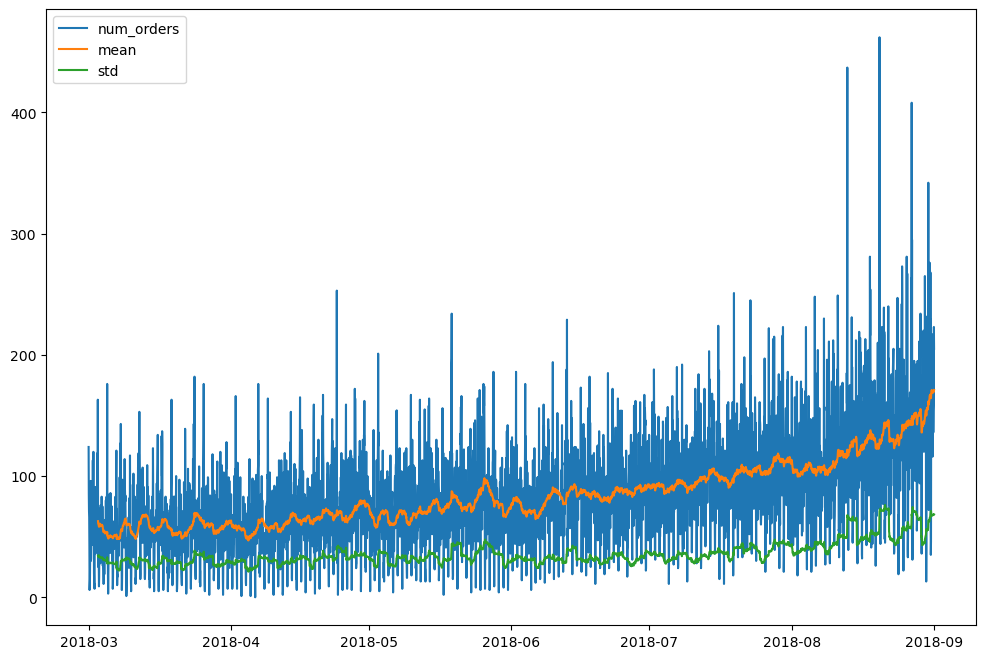

In [175]:
#data = data - data.shift()

plt.figure(figsize=(12, 8))
plt.plot(data['num_orders'], label='num_orders')
plt.plot(data['num_orders'].rolling(50).mean(), label='mean')
plt.plot(data['num_orders'].rolling(50).std(), label='std')
plt.legend()

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Пожалуйста, продублируй сюда ключевые выводы из раздела.  Что мы узнали в процесе анализа?
</div>

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Добавил небольшой вывод.</div>
</div>

Таким образом мы узнали, что при ресемплировании датасета по дням можно заметить следующее: Есть тренд в постепенном увеличении числа заказов, который нельзя отследить как сезонность в связи с маленьким количеством данных, а также найдена сезонность: суточная и недельная! Пройдя скользящим средним и скользящим стандартным отклонением можно сказать, что данные готовы для обучения.

## Обучение

Создадим метод, в котором добавим нашему датасету несколько признаков, которые помогут обучить нашу модель предсказывать количество заказов!

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Удалил месяц, год и день + добавил час</div>
</div>

In [176]:
def make_features(data, max_lag, rolling_mean_size):
    data['dayofweek'] = data.index.dayofweek
    data['hour'] = data.index.hour

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
👍 Хорошо, что в признаки ты выносишь день недели, в данных есть недельная сезонность.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В наших данных наблюдается очень четкая сезонность внутри дня. Рекомендую использовать информацию о часе в качестве признака.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Предлагаю удалить признак "день", т.к. сезонность внутри месяца мы не обнаружили.

</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
А вот календарные признаки "месяц" и "год" лучше удалить.  Данных у нас немного, всего 6 месяцев. При этом данные тренда мы учтем с помощью скользящего среднего и отстающих значений.
</div>


<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Сделал 168 168</div>
</div>

In [177]:
make_features(data, 168, 168)
data

/var/folders/47/4y0ypxc92dz4v_h0jyn8jqpw0000gn/T/ipykernel_53238/2323437576.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
/var/folders/47/4y0ypxc92dz4v_h0jyn8jqpw0000gn/T/ipykernel_53238/2323437576.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)
/var/folders/47/4y0ypxc92dz4v_h0jyn8jqpw0000gn/T/ipykernel_53238/2323437576.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the resul

,num_orders,dayofweek,hour,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,...,lag_160,lag_161,lag_162,lag_163,lag_164,lag_165,lag_166,lag_167,lag_168,rolling_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2018-03-01 00:00:00,124,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 01:00:00,85,3,1,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 02:00:00,71,3,2,85.0,124.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 03:00:00,66,3,3,71.0,85.0,124.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-01 04:00:00,43,3,4,66.0,71.0,85.0,124.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31 19:00:00,136,4,19,207.0,217.0,197.0,116.0,133.0,166.0,136.0,...,187.0,160.0,246.0,273.0,173.0,242.0,166.0,179.0,113.0,154.297619
2018-08-31 20:00:00,154,4,20,136.0,207.0,217.0,197.0,116.0,133.0,166.0,...,196.0,187.0,160.0,246.0,273.0,173.0,242.0,166.0,179.0,154.434524
2018-08-31 21:00:00,159,4,21,154.0,136.0,207.0,217.0,197.0,116.0,133.0,...,118.0,196.0,187.0,160.0,246.0,273.0,173.0,242.0,166.0,154.285714


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Совет: Гиперпараметры max_lag, rolling_mean_size очень важны. Не обязательно подбирать их автоматически, но рекомендую посмотреть разные значения. С их ростом заметно улучшаются качество моделей. И в этом есть логика. Например, среднее по скользящему окну - это составляющая чистого тренда. Но если брать её за 10 часов, в  ней будет сильная "шумная" компонента, связанная с суточной сезонностью. Однако,  если взять размер окна равный суткам, то мы уберем влияние суточной сезонности. А если взять размер окна равный неделе - то и влияние недельной сезонности.


Практическая рекомендация - рекомендую взять max_lag, rolling_mean_size  равными суткам или неделе (24 или 168 часов). При этом если взять 168 часов, то получаются отличные результаты, хотя за них приходится расплачиваться увеличенным объемом данных и возрастающим временем обучения.
</div>

Теперь разбиваем наш датасет на тренировочную и тестовую выборки в соотношении 9 к 1! и не забудем указать shuffle=False, иначе даты перемешаются!.

In [178]:
train, test = train_test_split(data, test_size=0.1, random_state=12345, shuffle=False)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

2018-03-08 00:00:00 2018-08-13 13:00:00
2018-08-13 14:00:00 2018-08-31 23:00:00


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Корректное разбиение, данные не перемешиваются. </div>

Первым делом обучим в лоб линейную регрессию.

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Добавил кросс-валидацию для посчета метрики</div>
</div>

In [186]:
lin_model = LinearRegression()
lin_model.fit(features_train, target_train)
grid = cross_val_score(lin_model, X=features_train, y=target_train, n_jobs=-1, scoring='neg_root_mean_squared_error', cv=TimeSeriesSplit(n_splits=5))
print('RMSE на кросс-валидации', grid.mean())

RMSE на кросс-валидации -22.545456496807056


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Использовать обучающую выборку для оценки модели - это неверно. Если следовать этой стратегии, мы выберем ту модель, которая сумела лучше зазубрить правильные ответы (переобучиться на обучающую выборку), но не ту модель, которая умеет лучше предсказывать на новых данных. </div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>минутка теории</b>

<b>общий дизайн ML исследования</b>

В курсе мы используем следующую схему оценки качества алгоритмов:

1. Все данные делятся на 3 части:
   - обучение,
   - валидация,
   - тест.

2. Каждый из алгоритмов будет обучен на обучающей выборке.
3. Подбор гиперпараметров мы осуществляем с помощью оценки на валидационной выборке.
4. Когда гиперпараметры подобраны, качество каждого алгоритма мы оцениваем с помощью валидационной выборки.

5. Выбираем лучший по оценке на валидационной выборке.
6. И уже самый лучший алгоритм оцениваем по тестовой выборке.


Есть более системный вариант этой схемы, с использованием кросс-валидации. В этом случае  схема немного адаптируется.

Все данные делятся на 2 части, первая будет использоваться для обучения и подбора гиперпараметров, и оценки алгоритмов с помощью кросс-валидации, вторая будет использоваться для финального тестирования.


Я советую до начала обучения моделей  решить для себя, какую стратегию стоит использовать в проекте (с кросс-валидацией или с выделением отдельной валидационной выборки).


<b>Дополнительные материалы:</b>


<a href="https://academy.yandex.ru/handbook/ml/article/kross-validaciya">Онлайн-учебник по машинному обучению от ШАД</a>


<a href="https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera/blob/master/2%20Supervised%20Learning/Lectures/2-1.Problema_pereobucheniya_i_bor_ba_s_nej.pdf">Конспект специализации Машинное обучение и анализ данных</a>, внимание двум последним страницам.
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>минутка теории</b>

<b>Что такое кросс-валидация</b>:

Это более системный подход, альтернатива стандартной валидационной выборке.  При кросс-валидации выборка делится на k блоков примерно одинакового размера.  Далее по очереди каждый из этих блоков используется для оценки модели (в качестве валидационной выборки), остальные используются в качестве обучающей выборки.

После того, как каждый из блоков будет использован в качестве валидационного, мы получим k оценок качества модели. Усредняя эти оценки мы получаем оценку модели по кросс-валидации.




<a href="https://academy.yandex.ru/handbook/ml/article/kross-validaciya">Онлайн-учебник по машинному обучению от ШАД</a>


<a href="https://github.com/minhdai2410/machine-learning-data-analysis-yandex-mipt-coursera/blob/master/2%20Supervised%20Learning/Lectures/2-1.Problema_pereobucheniya_i_bor_ba_s_nej.pdf">Конспект специализации Машинное обучение и анализ данных</a> , кросс-валидация подбробно разобрана на последних двух страницах.





</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>минутка теории</b>


<b>Как узнать оценку по кросс-валидации если гиперпараметры не подбирались?</b>
Просто применяем кросс-валидацию

	from sklearn.model_selection import cross_val_score

    scores_list = cross_val_score(estimator=model,
                                  X=features_train,
                                  y=target_train,
                                  cv=5,
                                  scoring=scorer)

    val_score = scores_list.mean()



<a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html">Документация</a>




</div>

RMSE около 22 для линейной регрессии - супер.

Теперь обучим случайный лес с кросс-валидацией.

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Оставил кросс-валидацию и не проверял на обучающей</div>
</div>

Fitting 5 folds for each of 55 candidates, totalling 275 fits
Лучшие параметры: {'max_depth': 35, 'n_estimators': 600}
Лучший счет: -22.803919744231212
CPU times: user 2min 17s, sys: 1.34 s, total: 2min 18s
Wall time: 22min 8s

In [180]:
# %%time
# model = RandomForestRegressor(random_state=12345)
# params = {'n_estimators': range(100, 601, 50), 'max_depth': range(5, 51, 10)}
# cv = TimeSeriesSplit(n_splits=5)
# grid = GridSearchCV(model, params, n_jobs=-1, verbose=True, cv=cv, scoring='neg_root_mean_squared_error')
# grid.fit(features_train, target_train)
# print('Лучшие параметры:', grid.best_params_)
# print('Лучший счет:', grid.best_score_)

In [181]:
forest = RandomForestRegressor(max_depth=35, n_estimators=600, random_state=12345)
forest.fit(features_train, target_train)

RandomForestRegressor(max_depth=35, n_estimators=600, random_state=12345)

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Корректное применение кросс-валидации

 - Правильно выбранная метрика neg_root_mean_squared_error
 - Использование TimeSeriesSplit
 - вывод лучшего результата best_score_
</div>

RMSE 22,8 - результат слабее линейной регрессии.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Не стоит использовать обучающую выбору для оценки модели. Тем более что у тебя есть оценка, полученная с помощою крос-валидации (grid.best_score_) </div>

bestTest = 5.339412081
bestIteration = 962

CPU times: user 1h 44min 50s, sys: 8min 23s, total: 1h 53min 13s
Wall time: 33min 52s

Теперь обучим градиентный бустинг.

Закоментил, так как очень долго считает, а лучшие параметры записал ниже.


И тут второй вопрос: стоить ли использовать TimeSeriesSplit в качестве cv? Вопрос появился, так как я выполнян кросс-валидацию у дерева и бустинга без него изначально, потом вспомнил, что на самом то деле это будет некорректно, потому что во вроемя валидации же мы каждый блок берем отдельно под валидацию и будет иногда так, что предсказываем прошлое по будущему! Узнал про TimeSeriesSplit и засунул его, но как только я его засунул и прогнал через кросс-валидацию на 40 минут лучшими стали дргугие параметры и метрика упала в ТРИ раза!
<br></br>
То есть до TimeSeriesSplit были такие параметры:
best_depth = 10
best_learning_rate = 0.03
best_l2 = 1
и метрика RMSE 0.6622289148333753
<br></br>
а после TimeSeriesSplit
best_depth = 4
best_learning_rate = 0.1
best_l2 = 6
и метрика RMSE 2.1390237937991747.


И в зависимости, использовать TimeSeriesSplit или нет, лучшая модель меняется: в первом случае бустинг, а во втором случайный лес. Пока по итогу оставил параметры первого случая и выделил лучшую как бустинг, однако если делать как я понял "правильно" с TimeSeriesSplit, то я должен был выбрать случайный лес, так как при параметрах второго случая у них метрика хуже: RMSE 2.1390237937991747 против RMSE 1.4660420381600217 у леса и выигрывает лес и в тестировании должен быть лес. Очень хотелось бы услышать мнение намного более опытного человека :( Спасибо!

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
TimeSeriesSplit для кросс-валидации по временным рядам использовать обязательно!</div>


{'depth': 4, 'l2_leaf_reg': 9, 'learning_rate': 0.1}
CPU times: user 4h 6min 37s, sys: 11min 4s, total: 4h 17min 41s
Wall time: 56min 50s

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Оставил кросс-валидацию и не проверял на обучающей выборке.</div>
</div>

In [182]:
# %%time
# model = CatBoostRegressor(loss_function="RMSE")
# params = {'learning_rate': [0.01, 0.03, 0.1, 0.12],
#         'depth': [4, 5, 6, 7, 10, 20],
#         'l2_leaf_reg': [1, 3, 5, 6,  7, 8, 9]}
# grid_search_result = model.grid_search(params, X=features_train, y=target_train, cv = TimeSeriesSplit(n_splits=5))
# print(grid_search_result['params'])

In [183]:
# print(grid_search_result["params"]["depth"])
# print(grid_search_result["params"]["learning_rate"])
# print(grid_search_result["params"]["l2_leaf_reg"])
best_depth = 4
best_learning_rate = 0.1
best_l2 = 9

In [184]:
model_cat = CatBoostRegressor(depth=best_depth, learning_rate=best_learning_rate, l2_leaf_reg= best_l2, loss_function='RMSE')
model_cat.fit(features_train, target_train)

0:	learn: 36.8148940	total: 6.53ms	remaining: 6.52s
1:	learn: 35.0369650	total: 10.2ms	remaining: 5.1s
2:	learn: 33.4626258	total: 13ms	remaining: 4.33s
3:	learn: 32.0653465	total: 22.7ms	remaining: 5.66s
4:	learn: 30.8270423	total: 28.3ms	remaining: 5.63s
5:	learn: 29.7503296	total: 32.3ms	remaining: 5.35s
6:	learn: 28.7626165	total: 36ms	remaining: 5.11s
7:	learn: 27.8875338	total: 38.7ms	remaining: 4.8s
8:	learn: 27.1187866	total: 42ms	remaining: 4.63s
9:	learn: 26.3586350	total: 45.2ms	remaining: 4.47s
10:	learn: 25.7403235	total: 48.8ms	remaining: 4.39s
11:	learn: 25.2007451	total: 52.3ms	remaining: 4.31s
12:	learn: 24.7043421	total: 59.3ms	remaining: 4.5s
13:	learn: 24.3339916	total: 64.6ms	remaining: 4.55s
14:	learn: 23.9324178	total: 67.9ms	remaining: 4.46s
15:	learn: 23.5769907	total: 71.6ms	remaining: 4.4s
16:	learn: 23.2811161	total: 74.7ms	remaining: 4.32s
17:	learn: 23.0093868	total: 78.3ms	remaining: 4.27s
18:	learn: 22.7665433	total: 81.8ms	remaining: 4.22s
19:	learn: 22

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Использовать обучающую выборку для оценки модели - это неверно. Если следовать этой стратегии, мы выберем ту модель, которая сумела лучше зазубрить правильные ответы (переобучиться на обучающую выборку), но не ту модель, которая умеет лучше предсказывать на новых данных. </div>

Градиентный бустинг показал худший результат - 29.4.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Тестирование

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика V1</b></font>
<div>Таким образом лучшей моделью оказалась линейная регрессия.. Выглядит как очень странно. Вообще не очень понимаю почему бустинг показывает худший результат уже который раз, вроде много параметров кросс-валидация подбирала, а по итогу все равно лучший Best Test 30, что намного хуже других моделей, где я ошибся, подскажи, пожалуйста!</div>
</div>

Проверим на тестовой выборке нашу лучшую модель - Линейную Регрессию!

In [185]:
print('RMSE LinReg', mean_squared_error(y_true=target_test, y_pred=lin_model.predict(features_test), squared=False))

RMSE СatBoost 35.05514996014509


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец:

  - выбрана лучшая модель
  - тестирование произведено корректно
  - достигнута хорошая метрика на тестовой выборке



</div>


## Выводы

Мы провели работу по анализу и предсказанию временных рядов. Первым делом мы прочитали данные и посмотрели на них - они были чистые и по первому взгляду заметили тренд - заказы растут в независимости от какого-либо события. Анализируя более подробно с помощью библиотеки *statsmodels*, мы заметили, что тренд первого взгляда истинен и заказы растут, а значит у бизнеса все идет хорошо, а вот сезонность найти сразу не удалось, поэтому мы рассмотрели ее более подробно и заметили, что меньше всего заказов в 6 утра, а больше всего в полночь. Затем мы разбили данные и обучили три модели: Линейную Регрессию, Случайный Лес и Градиентный Бустинг(Catboost), где лучшим образом себя показала первая модель с метрикой на тестовой выборке RMSE 35!


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне, ты изучил данные, нашел сезоность и тренд,   подготовил признаки и обучил модели. Достигнута "проходная" метрика на тестовой выборке. Также в проекте много графиков и пояснений.

Мне понравилось, что ты правильно использовал кросс-валидацию для временых рядов.

Что нужно обязательно доработать:

  - При ресемплировании нужно использовать агрегационную функцию сумма, а не среднее
  - Нужно удалить календарные признаки месяц и год
  - Нельзя использовать обучающую выборку для сравнения моделей между собой. Используй оценку с помощью кросс-валидации (не забывая про TimeSeriesSplit)

Желтые комментарии на твое усмотрение.

Жду твой проект на финальное ревью :)
</div>